In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'

df = pd.read_csv(file_path , parse_dates=['date'] , index_col='date')
df.tail()

,value
date,
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677
2008-05-01,22.912510
2008-06-01,19.431740


### 1. 등분산성을 위한 로그 변환 (= 분산을 일정하게)

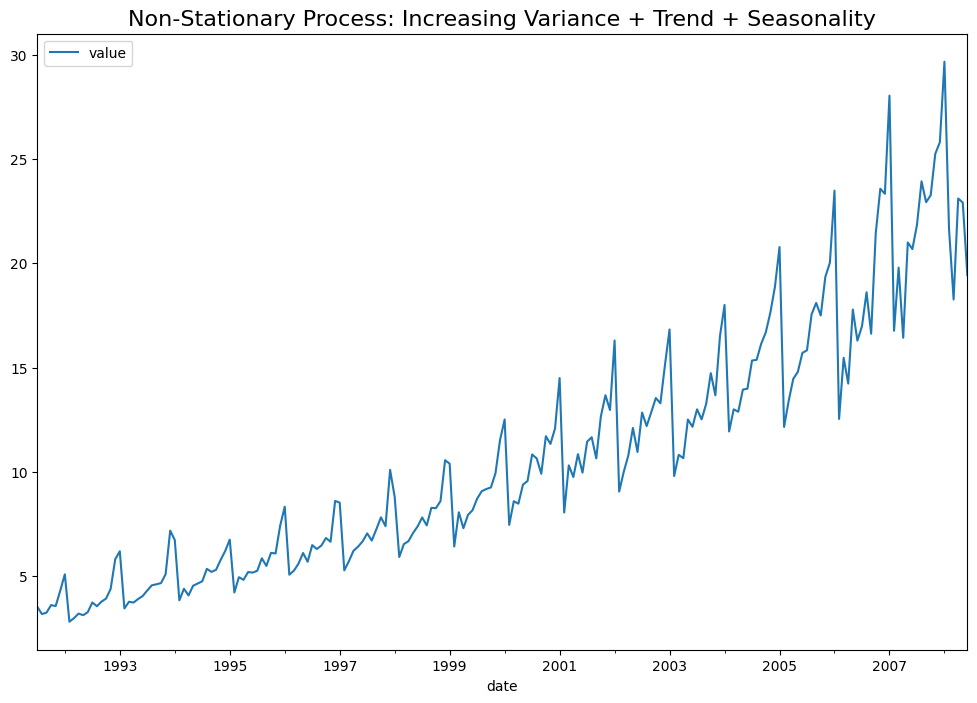

In [3]:
df.plot(figsize=(12,8))
plt.title('Non-Stationary Process: Increasing Variance + Trend + Seasonality', fontsize=16)
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller


def ADF(data):

    result = adfuller(data, autolag="AIC")

    print("---- Adfuller ----")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %1.10f' % result[1])
    print('Lag: %d' % result[2])
    print('observation: %d' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [5]:
ADF(df)

---- Adfuller ----
ADF Statistic: 3.145186
p-value: 1.0000000000
Lag: 15
observation: 188
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


In [9]:
df_vsf = np.log(df) # 로그를 씌워 분산률을 낮춤 (일정하게 함)
df_vsf

,value
date,
1991-07-01,1.260332
1991-08-01,1.157161
1991-09-01,1.179338
1991-10-01,1.283986
1991-11-01,1.271408
...,...
2008-02-01,3.075203
2008-03-01,2.904984
2008-04-01,3.140165


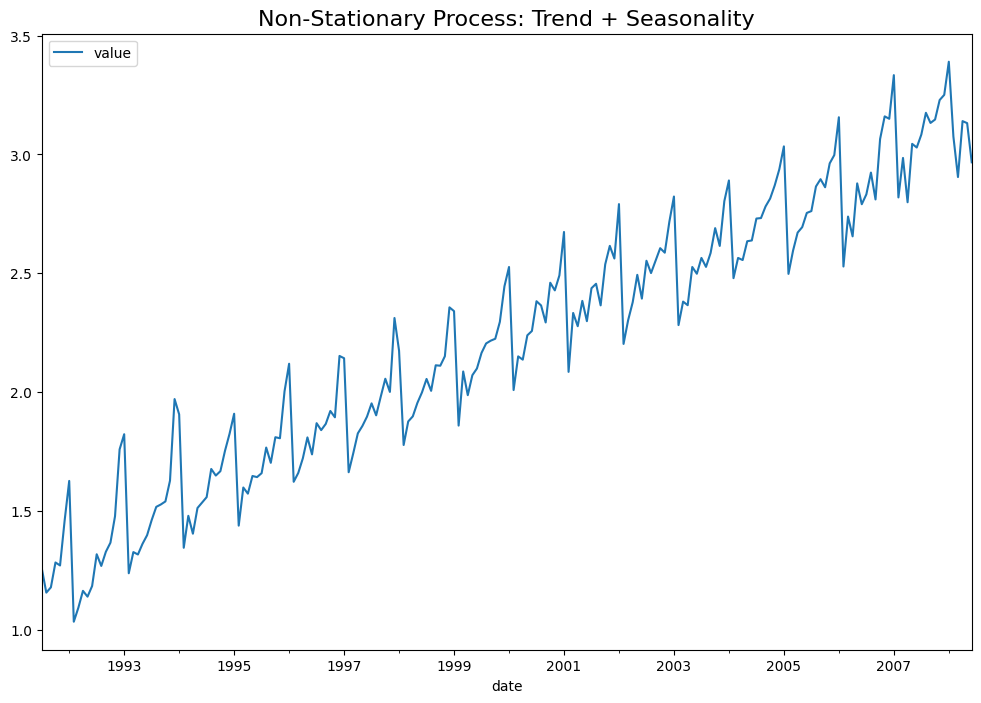

In [13]:
df_vsf.plot(figsize=(12,8))
plt.title('Non-Stationary Process: Trend + Seasonality', fontsize=16)
plt.show() # 변동 폭이 일정해진 것을 알 수 있음

### 차분을 통한 추세 제거

In [16]:
df_vsf.diff(1).isnull().sum()
df_vsf_diff1 = df_vsf.diff(1).dropna() # df_vsf.diff(1).iloc[1:, :]
df_vsf_diff1

,value
date,
1991-08-01,-0.103170
1991-09-01,0.022177
1991-10-01,0.104647
1991-11-01,-0.012578
1991-12-01,0.188688
...,...
2008-02-01,-0.314777
2008-03-01,-0.170220
2008-04-01,0.235181


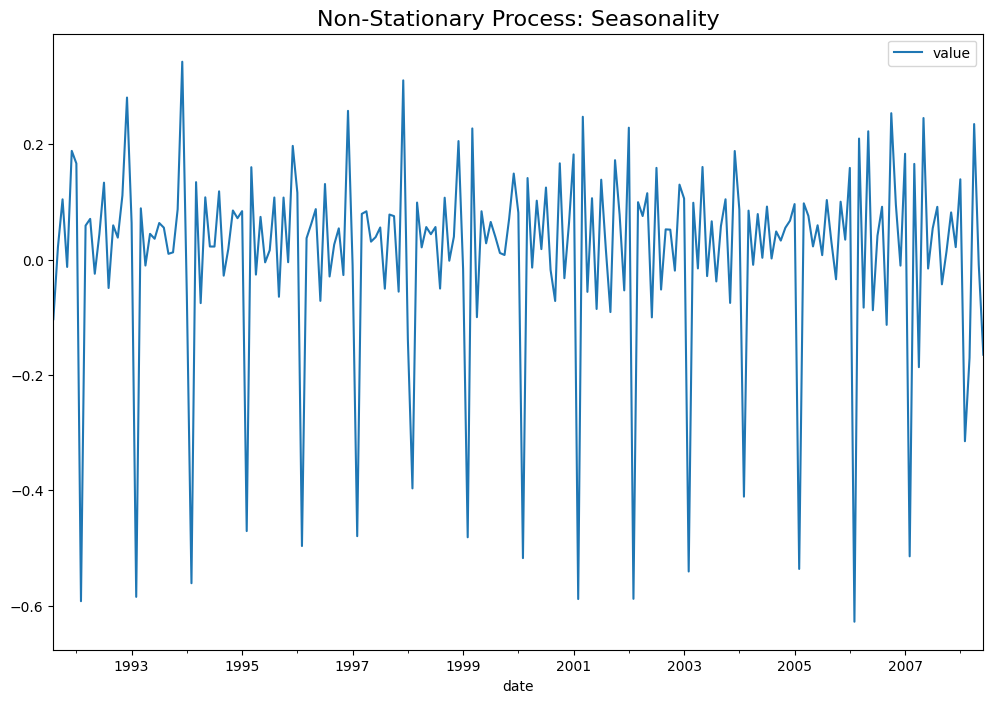

In [17]:
df_vsf_diff1.plot(figsize=(12,8))
plt.title('Non-Stationary Process: Seasonality', fontsize=16)
plt.show()

In [18]:
ADF(df_vsf_diff1)

---- Adfuller ----
ADF Statistic: -4.519432
p-value: 0.0001813384
Lag: 13
observation: 189
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575


### 차분, timelog : 12 -> 계절성 제거 (= 일정기간)

In [20]:
df_vsf_diff1.diff(12).isnull().sum()
df_vsf_diff1_diff12 = df_vsf_diff1.diff(12).dropna()
df_vsf_diff1_diff12


,value
date,
1992-08-01,0.054076
1992-09-01,0.037390
1992-10-01,-0.066394
1992-11-01,0.123880
1992-12-01,0.092449
...,...
2008-02-01,0.199572
2008-03-01,-0.336310
2008-04-01,0.421552


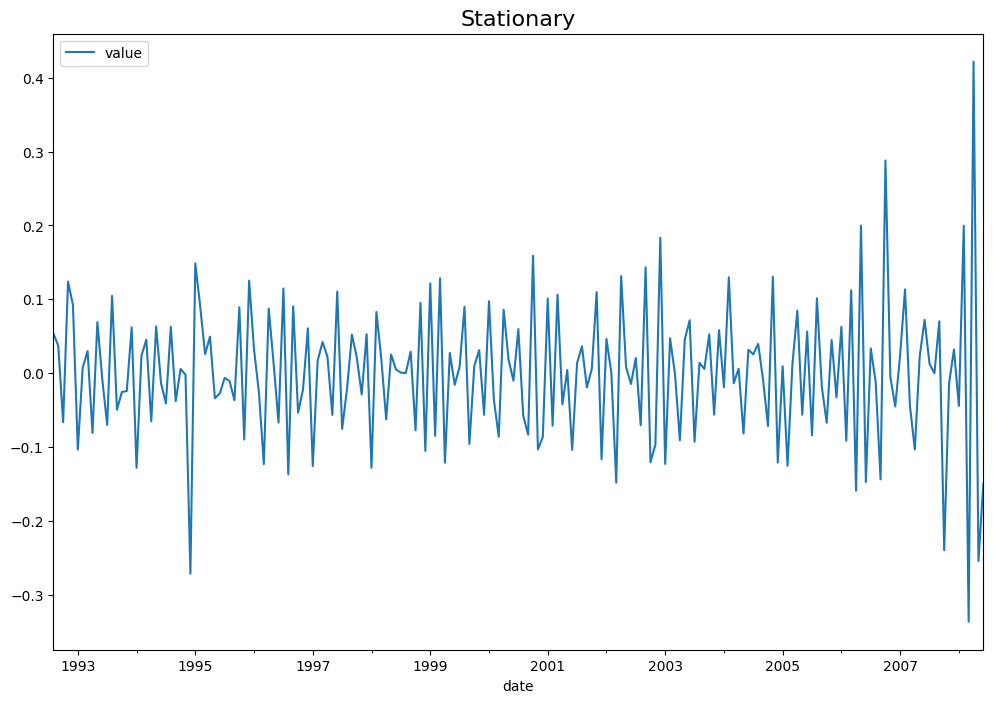

In [21]:
df_vsf_diff1_diff12.plot(figsize=(12,8))
plt.title('Stationary', fontsize=16)
plt.show()

In [22]:
ADF(df_vsf_diff1_diff12)

---- Adfuller ----
ADF Statistic: -4.785546
p-value: 0.0000579565
Lag: 13
observation: 177
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576
